In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.preprocessing import LabelEncoder # 전처리

# random_number = random.randint(1, 100)
random_number = 42

from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', '{:.2f}'.format) 

In [63]:
df_netflix = pd.read_csv('./data/netflix_user_data_clean_kbs.csv')

rename_map = {
    "Customer ID": "고객번호",
    "Subscription Length (Months)": "구독기간_개월",
    "Customer Satisfaction Score (1-10)": "고객만족도_1_10",
    "Daily Watch Time (Hours)": "일일시청시간_시간",
    "Engagement Rate (1-10)": "참여도_1_10",
    "Device Used Most Often": "주이용기기",
    "Genre Preference": "선호장르",
    "Region": "지역",
    "Payment History (On-Time/Delayed)": "결제이력_정시_지연",
    "Subscription Plan": "구독플랜",
    "Churn status": "이탈여부",
    "Support Queries Logged": "지원문의_건수",
    "Age": "나이",
    "Monthly Income ($)": "월소득_달러",
    "Promotional Offers Used": "프로모션_사용",
    "Number of Profiles Created": "생성프로필수"
}

df_netflix = df_netflix.drop('Customer ID', axis=1) # 쓸일 없을듯

In [64]:
# 원-핫 인코딩 적용할 컬럼 목록
columns_to_encode = ['Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan']

df = pd.get_dummies(df_netflix, columns=columns_to_encode, drop_first=True)

In [65]:
# 라벨 인코딩
le_churn_status = LabelEncoder()
col_name = 'Churn status'
df[col_name + '_le'] = le_churn_status.fit_transform(df[col_name])

In [66]:
x = df.drop(['Churn status','Churn status_le','Age'], axis=1)
y = df['Churn status_le']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=random_number)

In [68]:
# class_weight='balanced'
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=7,
    random_state=random_number,
    class_weight='balanced'
)

rf_clf.fit(x_train, y_train)

,n_estimators,101
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
print(f'학습 점수: {rf_clf.score(x_train, y_train)}')
print(f'테스트 점수: {rf_clf.score(x_test, y_test)}')

학습 점수: 0.673431949897177
테스트 점수: 0.665428160818816


In [70]:
y_pred = rf_clf.predict(x_test)

In [73]:
# 평가지표 - 정확도, Accuracy Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 실제 정답, 예측치(예측한 결과)

# pred = kn.predict(test_scaled)

# pred
# print(accuracy_score(test_label,pred))

              precision    recall  f1-score   support

           0       0.19      0.66      0.30      3087
           1       0.94      0.67      0.78     25442

    accuracy                           0.67     28529
   macro avg       0.57      0.66      0.54     28529
weighted avg       0.86      0.67      0.73     28529

[[ 2031  1056]
 [ 8489 16953]]


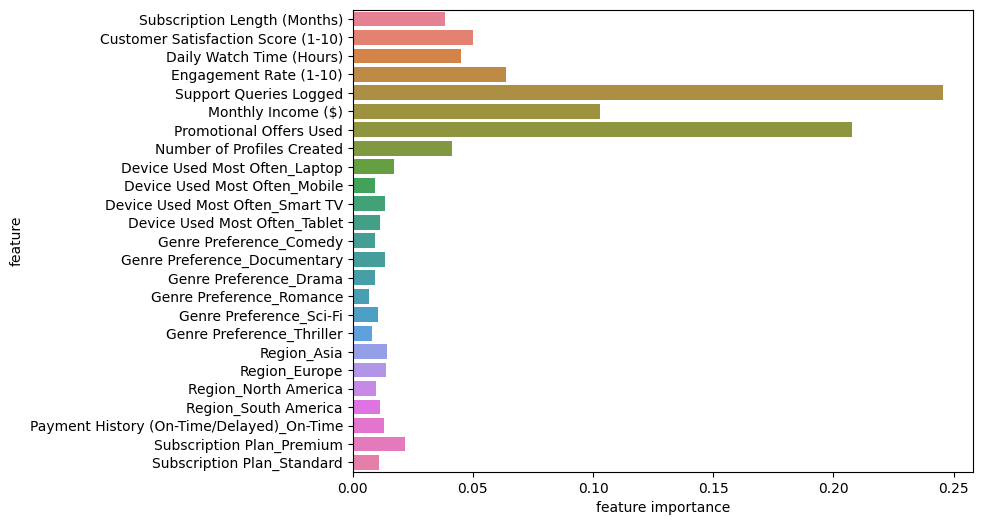

In [72]:
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=x.columns)#.sort_values(ascending=False)

# feat_imptc_ser


# 특성 중요도 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    x=feat_imptc_ser,
    y=feat_imptc_ser.index,
    hue=feat_imptc_ser.index
)

plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()